# Advance Classification Solution
### EDSA - Climate Change Belief Analysis 2022 
#### RecycleStats Solutions - Team 12 EDSA

© Explore Data Science Academy



<a id="cont"></a>
## Table of Content

<a href=#one>1. Introduction</a>

    1.1 Overview
    1.2 Problem Statement
    1.3 Instruction
        1.3.1 Model Version with COMET
        1.3.2 NLTK Corpora Installation
       
<a href=#two>1. Import Packages</a>

<a href=#three>2. Collect Data</a>

<a href=#four>4. Exploratory Data Analysis (EDA)<a>
    
    4.1 Missing Data Check
    4.2 Target Distribution Visualization

<a href=#five>5. Data Processing</a>
    
    5.1 Text Cleaning
        5.1.1 Remove Noise 
        5.1.2 Remove Punctuation
    5.2 Tokenization
    5.3 Count Vectorizer
    5.4 TF-IDF Vectorizer

<a href=#six>6. Modeling</a>
    
    6.1 Naive Bayes Model

<a href=#seven>7. Model Performance</a>
    
    7.1 Model Test Score
    7.2 Model Confusion Matrix

<a href=#eight>8. Saving & Exporting Model</a>

<a href=#nine>9. Best Model Explanations</a>

<a href=#ten>10. Conclusion</a>

<a href=#eleven>11. Recommendation</a>

<a href=#ref>Reference Document Links</a>

<a id="one"></a>
## 1. INTRODUCTION
<a href=#cont>Back to Table of Contents</a>

### 1.1 Overview

Many companies are built around lessening one’s environmental impact or carbon footprint. They offer products and services that are environmentally friendly and sustainable, in line with their values and ideals. They would like to determine how people perceive climate change and whether or not they believe it is a real threat. This would add to their market research efforts in gauging how their product/service may be received.

Hence, We will be creating a Machine Learning model that is able to classify whether or not a person believes in climate change, based on their novel tweet data.

Providing an accurate and robust solution to this task gives companies access to a broad base of consumer sentiment, spanning multiple demographic and geographic categories - thus increasing their insights and informing future marketing strategies.


### 1.2 Problem Statement

We are looking to Empower the marketing sector of Eco-Friendly Companies, helping them maximise productivity, driving profitability by knowledge of the demand & Supply on her goods & Services. 

### 1.3 Instruction

#### 1.3.1 Model Version with COMET
To Begin with, We will be using Comet, a great tool for model versioning and experimentation as it records the parameters and conditions from each of your experiements- allowing you to reproduce your results, or go back to a previous version of your experiment.

If you don't have a commet Accout, Go ahead to create an individual account, visit https://www.comet.ml/  You will see a project folder. That is where the records of your experiments can be viewed.

You should install as illustrated below if you don't already have it. Always import Experiment at the top of your notebook/script. (Always install if on Google Colab).

In [1]:
# Install Comet
!pip install comet_ml

In [2]:
# Import Comet package
from comet_ml import Experiment

# Setting the API key (saved as environment variable)
"""
Go ahead and get your api_key, project_name & workspace from your
Comet Project Folder.
"""
# Create an experiment with your api key
experiment = Experiment(
    api_key="CL3r4k2Kr1MFTRdavZUxjrBSy",
    project_name="team-12-advanced-classification-sentiment-analysis",
    workspace="ezysticks",
)

COMET WARNING: As you are running in a Jupyter environment, you will need to call `experiment.end()` when finished to ensure all metrics and code are logged before exiting.
COMET ERROR: Workspace ezysticks doesn't exist.


####  1.3.2 Ensure you've got NLTK Corpora installed
Some of the `nltk` text processing involve a lookup operation. For example, to find all [stopwords](https://www.geeksforgeeks.org/removing-stop-words-nltk-python/) in a given string of text, we require a list of all possible stopwords in the English language to use for the lookup. Such a list is refered to as a [corpus](https://en.wikipedia.org/wiki/Text_corpus). Therefore, first download the corpora we're going use if you don't have it installed, otherwise we may get a lookup error! Watch out specifically for the `tokenize` and `stopwords` sections. Not to worry, as we can easily avoid these errors by downloading the [corpora](http://www.nltk.org/nltk_data/) using the `nltk` downloader tool:

You should see this pop-up box. 

**NOTE:** the box might pop-up in the backround, in which case you should use `alt + tab` to switch to the downloader window.

<img src="https://github.com/Explore-AI/Pictures/blob/master/nltk_downloader.png?raw=true" width=50%/> 

Use it to navigate to the item we need to download: 
- stopwords corpus (Corpora tab)
- punkt tokenizer models (Models tab)

Navigate to these, click the download button, and exit the downloader when finished.

###### An additional Installation Required to run this Notebook Analysis Effectively

`Word Cloud:`
System Requirement: Microsoft Visual C++ 14.0 or greater is required. Get it with "Microsoft C++ Build Tools": https://visualstudio.microsoft.com/visual-cpp-build-tools/


In [3]:
''' If you don't have it Installed, Remove Hashtag to Run'''
!pip install wordcloud


`Imblearn:` Required while handling Class Imbalance 

In [4]:
!pip install imblearn

So, Let's Proceed

<a id="two"></a>
## 2. IMPORT PACKAGES
<a href=#cont>Back to Table of Contents</a>

In this section, we will be importing libraries which are a collections of modules in their classes and based on their functionality. For this Analysis and Modelling, we wil be requiring;

   ` For Data Manupulation, libraries such as Pandas, Numpy etc.`
   
`For Data Visualization, libraries such as mathplotlib, seaborn`
    
`libraries for data prepartion, feature selection, model building, Performance Calculation and more.`

**SEE** in-line comments BELOW for purpose per importation.

In [5]:
'''
if you don't have installed, the NLTK corpora, Remove Hashtag below and Run 
IF NOT, just run the import file.
'''
import nltk

#nltk.download()

In [6]:
""" For seamless run, Import All required libraries here """

# Libraries for data loading, data manipulation and data visulisation
import pandas as pd                                                   # for loading CSV data
import numpy as np                                                    # Used for mathematical operations
import matplotlib.pyplot as plt                                       # for Graphical Representation
%matplotlib inline                                                    
import seaborn as sns                                                 # for specialized plots
import re                                                             
import math                                                           
sns.set()                                                             # set plot style

# Libraries for data preparation
from nltk.corpus import stopwords                                     
import string                                                         
from nltk.tokenize import TweetTokenizer, regexp_tokenize                                                          
from nltk import RegexpTokenizer                                      
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer                    
from nltk import SnowballStemmer, PorterStemmer, LancasterStemmer     
from nltk.stem import WordNetLemmatizer                               
from nltk.util import ngrams                                          
from statsmodels.graphics.correlation import plot_corr                # To plot correlation heatmap

# Libraries for Feature Extraction
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer   

# Libraries for Model Building
from sklearn.model_selection import train_test_split                  # To split the data into training and testing data
from sklearn.naive_bayes import MultinomialNB

# Libraries for calculating performance metrics
from sklearn import metrics                                           # for
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay

# Libraries to Save/Restore Models
import pickle

# Setting global constants to ensure notebook results are reproducible


import warnings
warnings.filterwarnings('ignore')

<a id="three"></a>
## 3. Collect Data
<a href=#cont>Back to Table of Contents</a>

Data is required to help you find a solution to your data science problem. The data will provide insights that will lead you to a solution.

The collection of the data used for this analysis was funded by a Canada Foundation for Innovation JELF Grant to Chris Bauch, University of Waterloo, and made available by the EXPLORE Data Science Academy (EDSA) in challenging us during the Classification Sprint with the task of creating a Machine Learning model that is able to classify whether or not a person believes in climate change, based on their novel tweet data. 

The dataset aggregates tweets pertaining to climate change collected between Apr 27, 2015 and Feb 21, 2018. In total, 43943 tweets were collected.

In [7]:
# Load Data
df_train = pd.read_csv('train.csv')
df_test =pd.read_csv('test_with_no_labels.csv')

In [8]:
# View Dataset
df_train.head()

,sentiment,message,tweetid
0,1,PolySciMajor EPA chief doesn't think carbon di...,625221
1,1,It's not like we lack evidence of anthropogeni...,126103
2,2,RT @RawStory: Researchers say we have three ye...,698562
3,1,#TodayinMaker# WIRED : 2016 was a pivotal year...,573736
4,1,"RT @SoyNovioDeTodas: It's 2016, and a racist, ...",466954


In [9]:
# Lets see the shape of our Dataset.
print(f'No. of Tweets on our TRAIN dataset: {df_train.shape}')
print(f'No. of Tweets on our TEST dataaet: {df_test.shape}')

No. of Tweets on our TRAIN dataset: (15819, 3)
No. of Tweets on our TEST dataaet: (10546, 2)


In [10]:
# printing a list of all sentiment types we have in our data.
type_labels = list(df_train.sentiment.unique())
print(type_labels)

[1, 2, 0, -1]


We have available for training and Test our model, `15819 Tweets` & `10546 Tweets` respectively as seen above. Each tweet labelled, represents one of the following classes:

Class Description
*  2 **News:**     The tweet links to factual news about climate change
*  1 **Pro:**      The tweet supports the belief of man-made climate change
*  0 **Neutral:**  The tweet neither supports nor refutes the belief of man-made climate change
* -1 **Anti:**     The tweet does not believe in man-made climate change

Variable definitions
- **sentiment:** Sentiment of tweet
- **message:**   Tweet body
- **tweetid:**   Twitter unique id

<a id="four"></a>
## 4. Exploratory Data Analysis (EDA)
<a href=#cont>Back to Table of Contents</a>

This includes looking to understand patterns in our data, pinpoint any outliers and indicate relationships between variables. This phase includes descriptive statistics and data visualisations.

Hence, let's proceed to carrying out some EDA

#### 4.1 Missing Data Check
At the training phase it's important your dataset is ideal as possible, meaning things like; NO MISSING DATA in each observation.

In [11]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15819 entries, 0 to 15818
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   sentiment  15819 non-null  int64 
 1   message    15819 non-null  object
 2   tweetid    15819 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 370.9+ KB


The info command reveals presence of `Categorical` and `Numerical` features in our dataset, and as expected the message feature is categorical while the tweetid and sentiment are numerical. All features seem to have `Zero Non-Null` values. let's check to confirm count of null values present in each feature.

In [12]:
df_train.isnull().sum()

sentiment    0
message      0
tweetid      0
dtype: int64

This Confirms; `No Missing Values in our Dataset`

#### 4.2 Target Distribution Visualization

Let's Visualize the distribution of our Target Response within our Training DataSet i.e. how many data samples we have for each of the different sentiment types

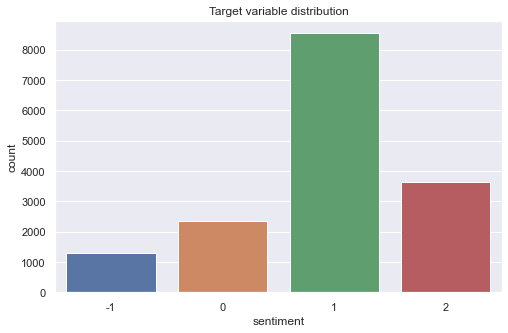

In [13]:
# Target variable distribution
sns.set_style('darkgrid')
plt.figure(figsize=(8, 5))
sns.countplot(df_train['sentiment'])
plt.title('Target variable distribution')
plt.show()

From the Sentiment Distribution, we can clear see a High level of `Class Imbalance` which is when the number of observations across different class labels are unevenly distributed. In training our classification model, it is preferable for all classes to have a relatively even split of observations. Hence we will trying out varying techniques to `Downsampling` the majority class to even off with the minority or `Upsampling` which is the reverse of Downsampling. We look to Trying the following
- Smote
- Oversampling
- Undersampling ...

<a id="five"></a>
## 5. DATA PROCESSING
<a href=#cont>Back to Table of Contents</a>

Let's get the data and clean it up a bit

### 5.1 Text Cleaning

#### 5.1.1 Remove Noise
In text analytics, removing noise (i.e. unneccesary information) is a key part of getting the data into a usable format

For our data set we will follow the following steps 
 * removing Removing hashtags, mentions, and links
 * making everything lower case
 * removing punctuation

In [14]:
# View Data
pd.set_option('display.max_colwidth', -1)      # set to display full text in df
df_train['message'].head(15)

0     PolySciMajor EPA chief doesn't think carbon dioxide is main cause of global warming and.. wait, what!? https://t.co/yeLvcEFXkC via @mashable            
1     It's not like we lack evidence of anthropogenic global warming                                                                                          
2     RT @RawStory: Researchers say we have three years to act on climate change before it’s too late https://t.co/WdT0KdUr2f https://t.co/Z0ANPT…            
3     #TodayinMaker# WIRED : 2016 was a pivotal year in the war on climate change https://t.co/44wOTxTLcD                                                     
4     RT @SoyNovioDeTodas: It's 2016, and a racist, sexist, climate change denying bigot is leading in the polls. #ElectionNight                              
5     Worth a read whether you do or don't believe in climate change https://t.co/ggLZVNYjun https://t.co/7AFE2mAH8j                                          
6     RT @thenation: Mike Pence doesn’t believ

Let's start by removing the url litter all over our data. The url is mainly the shortened version which contains no information of the context of it's address. Further insights can be done by search for keyword or phrases present in those address, but for our scope, we will limit our cleaning to replacing it with `'url-web'` , Reason being `So we can observe how tweets with links correlates with sentiments`

In [15]:
# So let's remove url
pattern_url = r'http[s]?://(?:[A-Za-z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9A-Fa-f][0-9A-Fa-f]))+'
subs_url = r'url-web'
df_train['message'] = df_train['message'].replace(to_replace = pattern_url, value = subs_url, regex = True)

In [16]:
# Let's view the MESSAGE created
pd.set_option('display.max_colwidth', -1)      # set to display full text in df
df_train['message'].head(15)

0     PolySciMajor EPA chief doesn't think carbon dioxide is main cause of global warming and.. wait, what!? url-web via @mashable               
1     It's not like we lack evidence of anthropogenic global warming                                                                             
2     RT @RawStory: Researchers say we have three years to act on climate change before it’s too late url-web url-web…                           
3     #TodayinMaker# WIRED : 2016 was a pivotal year in the war on climate change url-web                                                        
4     RT @SoyNovioDeTodas: It's 2016, and a racist, sexist, climate change denying bigot is leading in the polls. #ElectionNight                 
5     Worth a read whether you do or don't believe in climate change url-web url-web                                                             
6     RT @thenation: Mike Pence doesn’t believe in global warming or that smoking causes lung cancer. url-web               

As you can see in `index line 13:`  we have escape sequence present in front of the word TRUMP i.e. `\n\nTrump's`

So let's proceed to remove any occurance of [Escape Seqences](https://linuxconfig.org/list-of-python-escape-sequence-characters-with-examples) in our Text.

In [17]:
# Removing escape sequence
escape_seq = ["\r", "\n",'\a', '\b', '\f', "\`", '\”', '\t']
space_char = " "
df_train['message'] = df_train['message'].replace(to_replace = escape_seq, value = space_char, regex = True)

In [18]:
# Let's view the MESSAGE created
pd.set_option('display.max_colwidth', -1)      # set to display full text in df
df_train['message'].head(15)

0     PolySciMajor EPA chief doesn't think carbon dioxide is main cause of global warming and.. wait, what!? url-web via @mashable               
1     It's not like we lack evidence of anthropogenic global warming                                                                             
2     RT @RawStory: Researchers say we have three years to act on climate change before it’s too late url-web url-web…                           
3     #TodayinMaker# WIRED : 2016 was a pivotal year in the war on climate change url-web                                                        
4     RT @SoyNovioDeTodas: It's 2016, and a racist, sexist, climate change denying bigot is leading in the polls. #ElectionNight                 
5     Worth a read whether you do or don't believe in climate change url-web url-web                                                             
6     RT @thenation: Mike Pence doesn’t believe in global warming or that smoking causes lung cancer. url-web               

#### 5.1.2 Remove Punctuation 

Haven removed some unnecessary information (i.e info not entirely useful to training our desired outcome), we need make all the text lower case to remove some noise from capitalisation.

In [19]:
# first DeCaptilize our message (Convert to lowercase)
df_train['message'] = df_train['message'].str.lower()

In [20]:
# Define a function to handle punctuation removal
def remove_punctuation(post):
    return ''.join([l for l in post if l not in string.punctuation])

In [21]:
# Remove Punctutaion Noise
df_train['message'] = df_train['message'].apply(remove_punctuation)

In [22]:
# Verify Actions
pd.set_option('display.max_colwidth', -1)      # set to display full text in df
df_train['message'].head(15)

0     polyscimajor epa chief doesnt think carbon dioxide is main cause of global warming and wait what urlweb via mashable                   
1     its not like we lack evidence of anthropogenic global warming                                                                          
2     rt rawstory researchers say we have three years to act on climate change before it’s too late urlweb urlweb…                           
3     todayinmaker wired  2016 was a pivotal year in the war on climate change urlweb                                                        
4     rt soynoviodetodas its 2016 and a racist sexist climate change denying bigot is leading in the polls electionnight                     
5     worth a read whether you do or dont believe in climate change urlweb urlweb                                                            
6     rt thenation mike pence doesn’t believe in global warming or that smoking causes lung cancer urlweb                                    
7     

NOTE; Three kind of challanges still persist; We can further tackle

ASL fingerspelling, such as `ã¢â‚¬â¦` , lines `7`, `10` and so on

Text wrapped in  example `‘dangerous’` and `‘misled’`, lines 12 & 14 resp.

Thirdly, continoius dots e.g `warming………` and `urlweb…` lines `9` and `12` resp. and so on

But for now let's Proceed to Tokenization

### 5.2 Tokenization

In [23]:
# Apply the tweet tokenization
tt = TweetTokenizer()
df_train['message'].apply(tt.tokenize)

0        [polyscimajor, epa, chief, doesnt, think, carbon, dioxide, is, main, cause, of, global, warming, and, wait, what, urlweb, via, mashable]                          
1        [its, not, like, we, lack, evidence, of, anthropogenic, global, warming]                                                                                          
2        [rt, rawstory, researchers, say, we, have, three, years, to, act, on, climate, change, before, it, ’, s, too, late, urlweb, urlweb, …]                            
3        [todayinmaker, wired, 2016, was, a, pivotal, year, in, the, war, on, climate, change, urlweb]                                                                     
4        [rt, soynoviodetodas, its, 2016, and, a, racist, sexist, climate, change, denying, bigot, is, leading, in, the, polls, electionnight]                             
                                                                         ...                                                                

Haven Tokenize our Words, let's visualize the Tokens with the most sentiment using `WordCloud`. word Cloud for the various sentiments: wordcloud_neg(-1), wordcloud_neu(0), wordcloud_weak(1) and wordcloud_strong(2). From the Cloud, we noticed that the stems: "Chang" and "climat" has the highest frequency in all the sentiments hence they will be purged in the data engineering section because they contribute nothing to the model. </br>We also observed that the more URLs in the tweets, the higher the sentiments about climate change.

##### Repeat Text Cleaning for Test DataSet
NOTE: All functions applied have already been defined while cleaning our Train Data.

In [24]:
# Removing Noise
df_test['message'] = df_test['message'].replace(to_replace = pattern_url, value = subs_url, regex = True)
df_test['message'] = df_test['message'].replace(to_replace = escape_seq, value = space_char, regex = True)

In [25]:
# Convert Capitals, Remove Punctuations
df_test['message'] = df_test['message'].str.lower()
df_test['message'] = df_test['message'].apply(remove_punctuation)

In [26]:
# Tokenisation
df_test['message'].apply(tt.tokenize)

0        [europe, will, now, be, looking, to, china, to, make, sure, that, it, is, not, alone, in, fighting, climate, change, …, urlweb]                              
1        [combine, this, with, the, polling, of, staffers, re, climate, change, and, womens, rights, and, you, have, a, fascist, state, urlweb]                       
2        [the, scary, unimpeachable, evidence, that, climate, change, is, already, here, urlweb, itstimetochange, climatechange, zeroco, 2]                           
3        [karoli, morgfair, osborneink, dailykos, putin, got, to, you, too, jill, trump, doesnt, believe, in, climate, change, at, all, thinks, its, s, hoax]         
4        [rt, fakewillmoore, female, orgasms, cause, global, warming, sarcastic, republican]                                                                          
                                                ...                                                                                                                  

`There are other forms of text cleaning that are important to be applied, such as;`

    STEMMING is the process of transforming to the root word. It uses an algorithm that removes common word-endings from English words, such as “ly,” “es,” “ed,” and “s”. Some methods includes `Porter`, `Lancaster`, `Snowball`.
    
    LEMMATIZATION similar to stemming, it processes by grouping words of similar meaning together. In other words, your root STEM(the word you ended up with), is not something you can just look up in a dictionary, often called LEMMA.
    
    STOPWORD words which do not contain important significance to be used in Search Queries `e.g as, and, if`. Usually these words are filtered out from search queries because they return a vast amount of unnecessary information.
    
NOW thanks to Python...

sklearn has a built in text feature extraction module called `CountVectorizer` that will literally do all of that work in one line of code! This function will convert a collection of documents (rows of text) into a matrix of token counts.

So let's go ahead to apply the CountVectorizer.


### 5.3 Count Vectorizer

Let's first split our dataset because................(FILL IN: EXPERIEMENT what happens if we CountVectorize before splitting, what happens)

In [27]:
# First features and label 
X_train = df_train['message']
y_train = df_train['sentiment']

# split data to Train/Test set
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.25, random_state = 42)

Before we move on, let's take a look at the distribution of observations between our classes.

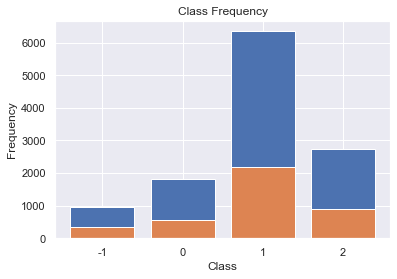

 1    6352
 2    2746
 0    1806
-1    960 
Name: sentiment, dtype: int64

In [28]:
unique, counts = np.unique(y_train, return_counts=True)
plt.bar(unique, counts)
unique, counts = np.unique(y_test, return_counts=True)
plt.bar(unique, counts)

plt.title('Class Frequency')
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.xticks(ticks=[2,1,0,-1], labels=[2,1,0,-1])

plt.show()
y_train.value_counts()

**Class Imbalance still needs to be tackled here: there are 8530 (6352) observations in class 1 and only 1296 (960) in class -1.**

The Effect this will have on the predictivity of our model can't be more emphazised.

let's proceed to initializing and fitting a tuned CountVectorizer, so that we can tackle the Class Imbalance challange and then proceed to Train and Testing data.

In [132]:
# initilize count vectorizer
betterVect = CountVectorizer(stop_words='english', 
                             min_df=1, 
                             max_df=0.5, 
                             ngram_range=(1, 5))

In [133]:
#transform the split training data using only the 'message' column values
count_train =betterVect.fit_transform(X_train.values)

#transform the split test data using only the 'message' column values
count_test=betterVect.transform(X_test.values)

# Repeat for Main Test Data
counteer_test = betterVect.transform(df_test['message'])

In [134]:
# print the first 10 features of the count_vectorizer
print(betterVect.get_feature_names()[:100])

['000005', '004', '004 change', '004 change climate', '004 change climate dreams', '00kevin7', '00kevin7 mannyottawa', '00kevin7 mannyottawa ecosensenow', '00kevin7 mannyottawa ecosensenow youtube', '00kevin7 mannyottawa ecosensenow youtube obviously', '010536', '010536 http', '012', '012 urlweb', '012 urlweb urlweb', '02cents0', '02cents0 positivelyjoan', '02cents0 positivelyjoan rt', '02cents0 positivelyjoan rt doughravme', '02cents0 positivelyjoan rt doughravme florida', '0324', '0324 earthhour', '0324 earthhour 2016', '0324 earthhour 2016 goes', '0324 earthhour 2016 goes dark', '0519am', '0519am climate', '0519am climate change', '0519am climate change looks', '0519am climate change looks like', '07', '094', '094 amazon', '094 amazon kindle', '094 amazon kindle urlweb', '0bama', '0bama 9112001', '0bama 9112001 amp', '0bama 9112001 amp climate', '0bama 9112001 amp climate change', '0bamas', '0bamas ties', '0bamas ties global', '0bamas ties global warming', '0bamas ties global warmin

### 5.4 TF-IDF Vectorizer

TF-IDF which stands for `Term Frequency-Inverse Document Frequency`.It is a commonly used NLP (Natural Language Processing) model that helps you determine the most important words in each document in the corpus.The idea behind TFIDF is that each corpus may have shared words beyond just the stopwords.These common words are like stop words and should be removed or atleast downweighted in importance.

In [135]:
# initilize TF-IDF Vectorizer
tfidf = TfidfVectorizer(stop_words='english', max_df =0.7)

In [136]:
# Transform train & test data
tfidf_train =tfidf.fit_transform(X_train)
tfidf_test =tfidf.transform(X_test)

# Repeat for test data
tfidf_test =tfidf.transform(X_test)

In [137]:
# print the first 10 features of the TF-IDF Vectorizer
print(tfidf.get_feature_names()[:100])

['000005', '004', '00kevin7', '010536', '012', '02cents0', '0324', '0519am', '07', '094', '0bama', '0bamas', '0x526978', '10', '100', '1000', '100000', '100000250000', '1000s', '1001', '100daysofshame', '100h', '100isnow', '100pmin', '100s', '100th', '100x', '101', '1010', '1015', '1030', '105', '106', '109c', '10bucks', '10most', '10th', '10yrs', '10ã', '11', '110', '1100', '1110c', '1111', '1123', '1130', '114', '1140', '115', '11500', '11pm', '11th', '11yearold', '12', '1200', '120k', '1224', '125', '127150', '12am', '12balboa', '12th', '13', '130', '1306chomley', '131', '139', '14', '140', '140b', '145', '1459', '1464', '146th', '1488ã', '15', '150', '15000', '15c', '15degree', '15th', '15yearold', '15ã', '16', '160000', '164', '16yearold', '17', '170', '17352', '175', '1778', '177crln13days', '17mohdsajid', '17posc225', '18', '1800', '18001930', '1800s', '180bn']


In [138]:
#print the first 20 vectors of tfidf training data
print(tfidf_train.A[:10])

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [139]:
# create tfidf vectorizer df
tfidf_df = pd.DataFrame(tfidf_train.A, columns=tfidf.get_feature_names())
print(tfidf_df.head())

   000005  004  00kevin7  010536  012  02cents0  0324  0519am   07  094  ...  \
0  0.0     0.0  0.0       0.0     0.0  0.0       0.0   0.0     0.0  0.0  ...   
1  0.0     0.0  0.0       0.0     0.0  0.0       0.0   0.0     0.0  0.0  ...   
2  0.0     0.0  0.0       0.0     0.0  0.0       0.0   0.0     0.0  0.0  ...   
3  0.0     0.0  0.0       0.0     0.0  0.0       0.0   0.0     0.0  0.0  ...   
4  0.0     0.0  0.0       0.0     0.0  0.0       0.0   0.0     0.0  0.0  ...   

    โอ  と通知した  どうなる米国  スタリん時代のソ連や毛沢東の文化大革命並のサイエンスに政治的介入だ  地球温暖化会議  報告書は  \
0  0.0  0.0    0.0     0.0                                0.0      0.0    
1  0.0  0.0    0.0     0.0                                0.0      0.0    
2  0.0  0.0    0.0     0.0                                0.0      0.0    
3  0.0  0.0    0.0     0.0                                0.0      0.0    
4  0.0  0.0    0.0     0.0                                0.0      0.0    

   欧州が最も大きく地球温暖化の影響を受けていると警告しています  気候変動との表現を削除しないと予算を貰えない  申請書のアブストラ

Forget about thhe chinese, it's well understandable English text ready to be feed to our model.

<a id="six"></a>
## 6. Modeling
<a href=#cont>Back to Table of Contents</a>



### 6.1. Naive Bayes Model

Naive bayes is most commonly used for testing NLP classification because of its basis in probability. Naive bayes algorithm attempts to answer the question 'Given a particular piece of data how likely is the outcome?'

Each word acts as a feature from our count vectorizer helping classify our message using probability.

There are three types of Naive Bayes model under the scikit-learn library:

    Gaussian: It is used in classification and it assumes that features follow a normal distribution.

    Multinomial: It is used for discrete counts. For example, let’s say,  we have a text classification problem. Here we can consider Bernoulli trials which is one step further and instead of “word occurring in the document”, we have “count how often word occurs in the document”, you can think of it as “number of times outcome number x_i is observed over the n trials”.

    Bernoulli: The binomial model is useful if your feature vectors are binary (i.e. zeros and ones). One application would be text classification with ‘bag of words’ model where the 1s & 0s are “word occurs in the document” and “word does not occur in the document” respectively.

We choose the Multinomial Naive Bayes (MultinomialNB) Model because of how well it works with count vectorizer as it expects integer inputs.


In [126]:
# initialize classifier
nb_classifier = MultinomialNB()

from sklearn.ensemble import RandomForestClassifier
# Instantiating the model
clf = RandomForestClassifier(max_depth = 25, random_state = 42)

In [127]:
# Then deal with Class Imbalance
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state = 42)
X_train_oversampled, y_train_oversampled = sm.fit_resample(count_train, y_train)

Application of Oversampling technique to resolving class imbalance tend to overfit train data resulting in poor performance of our model. So it's application is dropped

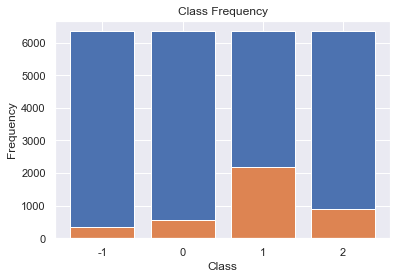

-1    6352
 1    6352
 0    6352
 2    6352
Name: sentiment, dtype: int64

In [128]:
uni, cts = np.unique(y_train_oversampled, return_counts=True)
plt.bar(uni, cts)
uni, cts = np.unique(y_test, return_counts=True)
plt.bar(uni, cts)

plt.title('Class Frequency')
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.xticks(ticks=[2,1,0,-1], labels=[2,1,0,-1])

plt.show()
y_train_oversampled.value_counts()

NOW; We have Oversampled our dataset using the SMOTE method. Note that this was applied only to the training dataset and the Test set (in red) remains untouched to act for as unseen/ Real world data.

In [129]:
## OBSERVE WE USED count_train NOT the Oversampled train data.
# Training Model with CountVector
nb_classifier.fit(count_train, y_train)

clf.fit(count_train, y_train)

RandomForestClassifier(max_depth=25, random_state=42)

In [130]:
# Predicting for Counter Vectorizer
pred_coutv_mnb = nb_classifier.predict(count_test)

# Making predictions
# clf_y_pred = clf.predict(X_test)
'''
REASON FROM HASHING OUT clf_y_pred: AWAITING RESOLUTION

ValueError: could not convert string to float: 'rt antonioparis texas is experiencing its third 
‘500year’ flood in 3 years bad luck or climate change what do you think urlweb…'
'''

"\nREASON FROM HASHING OUT clf_y_pred: AWAITING RESOLUTION\n\nValueError: could not convert string to float: 'rt antonioparis texas is experiencing its third \n‘500year’ flood in 3 years bad luck or climate change what do you think urlweb…'\n"

<a id="seven"></a>
## 7. MODEL PERFORMANCE
<a href=#cont>Back to Table of Contents</a>



### 7.1 Model Testing Scores


In [131]:
labels = ['1: News', '2: Pro', '0: Neutral', '-1: Anti']
print('Classification Report')
Classification_Report = classification_report(y_test, pred_coutv_mnb, target_names=labels)
print(Classification_Report)

Classification Report
              precision    recall  f1-score   support

     1: News       0.00      0.00      0.00       336
      2: Pro       0.30      0.42      0.35       547
  0: Neutral       0.66      0.74      0.70      2178
    -1: Anti       0.56      0.49      0.52       894

    accuracy                           0.57      3955
   macro avg       0.38      0.41      0.39      3955
weighted avg       0.53      0.57      0.55      3955



In [116]:
# CLF
# labels = ['1: News', '2: Pro', '0: Neutral', '-1: Anti']
# print('Classification Report')
# print(classification_report(y_test, clf_y_pred, target_names=labels))

In [117]:
print(f'Accuracy Score: {round(metrics.accuracy_score(y_test, pred_coutv_mnb), 2) * 100}''%')

Accuracy Score: 73.0%


In [45]:
# print(f'Accuracy Score: {round(metrics.accuracy_score(y_test, clf_y_pred), 2) * 100}''%')

1. first Accuracy Score: 71.0%

### 7.2 Model Confusion matrix

In [46]:
labels = ['1: News', '2: Pro', '0: Neutral', '-1: Anti']
pd.DataFrame(data=confusion_matrix(y_test, pred_coutv_mnb), index=labels, columns=labels)

,1: News,2: Pro,0: Neutral,-1: Anti
1: News,86,25,199,26
2: Pro,10,137,345,55
0: Neutral,5,33,1942,198
-1: Anti,2,7,195,690


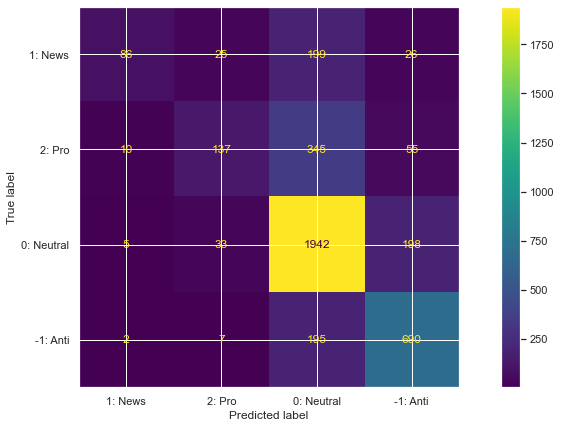

In [47]:
# Confusion matrix
labels = ['1: News', '2: Pro', '0: Neutral', '-1: Anti']
cm = confusion_matrix(y_test, pred_coutv_mnb)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
fig, ax = plt.subplots(figsize=(15,7))
disp.plot(ax=ax)
plt.show()

<a id="eight"></a>
## 8. SAVING & EXPORTING MODEL
<a href=#cont>Back to Table of Contents</a>

In [48]:
tester = nb_classifier.predict(counteer_test)

save_df = pd.DataFrame(tester, columns=['sentiment'])

In [49]:
output=pd.DataFrame({'tweetid': df_test['tweetid']})
submission=output.join(save_df)

In [50]:
#submission.to_csv('submission.csv',index=False)

In [51]:
# View Exported CSV file
#submission.head(10)

### Logging to Comet

In [52]:
# Create dictionaries for the data we want to log
# param_grid = (min_df = 1, max_df=0.5, ngram_range=(1, 1), max_depth=25)

params = {"random_state": 42,
           "test_size": 0.25,
          "model_type": "Multinomial Naive Bayes",
          "scaler": "standard scaler",
          "stratify": True
          }

In [53]:
# Log our parameters and results
experiment.log_parameters(params)
# experiment.log_metrics(metrics)
experiment.log_metric("Classification_Report", Classification_Report) , 
experiment.log_notebook('3.0 Advance_Classification_Notebook.ipynb', overwrite=False)

If you're using comet within a jupyter notebook, it's important to end your experiment when you've finished as illustrated below.

In [54]:
# STRICTLY FOR LOCAL JUPYTER NOTEBOOKS
experiment.end()

#### Applying tfidf Vectors
To avoid Error due to DIMENSION MISMATCH, let's test our tfidf Vector Here. 

In [55]:
# Training Model with tfidf Vector
nb_classifier.fit(tfidf_train, y_train)

# Predicting for tfidf Vectorizer
pred_tfidf_mnb = nb_classifier.predict(tfidf_test)

In [56]:
labels = ['1: News', '2: Pro', '0: Neutral', '-1: Anti']
print('Classification Report')
print(classification_report(y_test, pred_tfidf_mnb, target_names=labels))

Classification Report
              precision    recall  f1-score   support

     1: News       1.00      0.02      0.04       336
      2: Pro       1.00      0.06      0.12       547
  0: Neutral       0.62      0.98      0.76      2178
    -1: Anti       0.88      0.46      0.61       894

    accuracy                           0.66      3955
   macro avg       0.87      0.38      0.38      3955
weighted avg       0.76      0.66      0.58      3955



In [57]:
print(f'Accuracy Score: {round(metrics.accuracy_score(y_test, pred_tfidf_mnb), 2) * 100}''%')

Accuracy Score: 66.0%


<a id="nine"></a>
## 9. BEST MODEL EXPLANATION
<a href=#cont>Back to Table of Contents</a>



Clearly the Model created using CoutVectorizer is much better than that of tfidf Vectors

<a id="ten"></a>
## 10. Conclusion
<a href=#cont>Back to Table of Contents</a>

...........................

<a id="eleven"></a>
## 11. Recommendation
<a href=#cont>Back to Table of Contents</a>

<a id="ref"></a>
## Reference Links
<a href=#cont>Back to Table of Contents</a>

* [GitHub Collab Ref.](https://github.com/)
* [Commet Collab Ref](https://www.comet.ml/) 
* [Kaggle Collab Ref](https://www.kaggle.com/c/edsa-climate-change-belief-analysis-2022/overview)